In [5]:
#name: tina fazeli
#student number: 990201110005

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from numpy.random import randint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
from sklearn.datasets import make_blobs

In [13]:
data, y= make_blobs(n_samples=300, n_features=6, centers=4, cluster_std=5.0, random_state=42)

In [14]:
print('data:', data)
print('\ny:', y)

data: [[ -7.4090008    8.99580687   5.3150216   14.21247425 -10.47304625
    5.40671082]
 [ -0.237676     0.48753696  -4.85477077 -16.01416685 -11.7853886
    3.64015738]
 [ -2.48363034   7.84135046  -2.43697487  -0.13005693  -8.59319977
  -10.89149594]
 ...
 [ 12.63171032  -6.54586565  -6.50002335 -10.9982496   -6.1315664
   -3.92888494]
 [-14.24364439  10.40320095   4.98780652   2.61371936  -7.957645
    3.14262916]
 [ -8.34166623  11.08045853  -6.32472617   6.87825252 -12.90142891
   12.25119039]]

y: [1 3 0 3 1 3 3 1 3 0 1 2 1 3 1 3 0 2 3 0 2 0 2 1 3 0 3 1 1 2 0 3 0 2 2 1 2
 1 1 0 3 2 2 1 1 3 3 1 0 3 2 0 0 0 3 2 2 0 3 0 1 2 0 1 1 0 2 2 2 3 3 2 0 3
 1 2 3 2 1 1 1 3 1 1 2 3 0 0 3 2 3 0 3 0 1 1 0 3 0 3 3 0 1 0 3 0 3 3 1 3 1
 2 1 0 3 3 0 0 1 3 1 2 2 3 0 2 2 0 3 0 1 3 3 1 3 0 3 1 2 0 1 1 2 1 3 0 0 3
 1 2 2 1 0 1 2 1 0 1 3 1 2 3 0 0 2 1 2 2 1 0 2 0 1 1 0 1 3 2 0 2 3 2 3 3 1
 0 0 0 3 3 2 3 2 0 0 3 0 2 1 1 2 2 2 1 2 1 0 3 2 3 1 2 2 1 0 0 0 3 3 1 1 2
 2 2 2 3 3 3 2 0 1 0 2 0 0 3 2 0 2 3 2 0

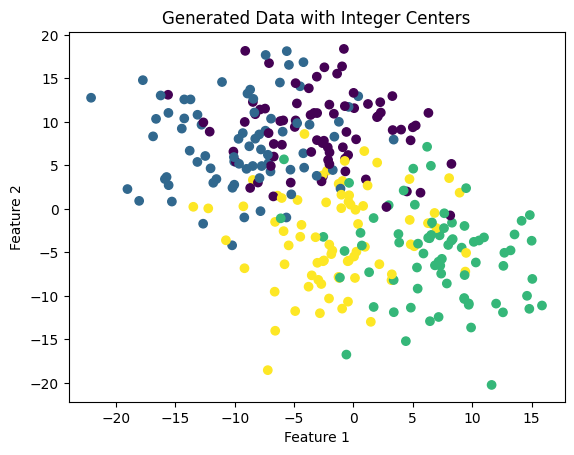

In [15]:
# Display  the generated data 
plt.scatter(data[:,0],data[:,1], c=y, cmap='viridis')
plt.title('Generated Data with Integer Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [16]:
X_train , X_test, y_train, y_test= train_test_split(data, y, test_size=0.3, random_state=42)

In [28]:
# Custom Euclidean distance function
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance
    pass
class CustomKNN:
    def __init__(self, k=4):
        self.k = k
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        # use _predict function to predict X_test Labels
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)
        
    def _predict(self, x):
        # Calculate distances to all points in the training set
        # Get indices of k-nearest training data points
        # Get the labels of the k-nearest training data points
        # Return the most common class label among the k-nearest neighbors
        distances=[euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_label=[]
        for i in k_indices:
            k_nearest_label.append(self.y_train[i])
        most_common={}
        number=0
        for i in range(len(k_nearest_label)-1):
            if k_nearest_label[i] == k_nearest_label[i+1]:
                number+=1
            if k_nearest_label[i] not in most_common:
                most_common[k_nearest_label[i]]=number
        sort_orders = sorted(most_common.items(), key=lambda x: x[1], reverse=True)
        return sort_orders[0][0]
        
        
        

In [29]:
knn = CustomKNN(k=4)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 85.56%


In [ ]:
#Accuracy: 85.56%

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
####################### (15 points) #######################

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.85
Recall: 0.86
F1 Score: 0.85


In [ ]:
#Precision: 0.85
#Recall:0.86
#F1 Score: 0.85

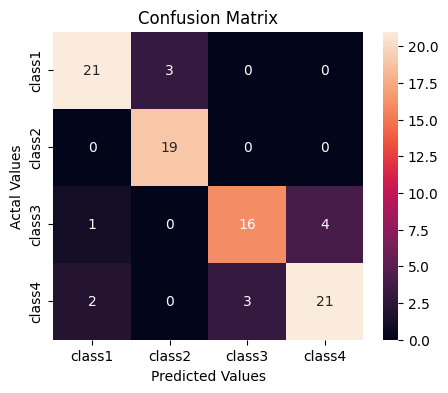

In [27]:
# confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['class1','class2','class3','class4'],
                     columns = ['class1','class2','class3', 'class4'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()